In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# raw dataset
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129525 entries, 0 to 2129524
Data columns (total 35 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   PdId                                                      int64  
 1   IncidntNum                                                int64  
 2   Incident Code                                             int64  
 3   Category                                                  object 
 4   Descript                                                  object 
 5   DayOfWeek                                                 object 
 6   Date                                                      object 
 7   Time                                                      object 
 8   PdDistrict                                                object 
 9   Resolution                                                object 
 10  Address                       

In [105]:
# cutting off colums after 14
df = df.iloc[:,:14]
df.shape

(2129525, 14)

In [106]:
# convert the datatype of Date in to datetime for filter
df['Date'] = pd.to_datetime(df['Date'])

# extract data after 2016/01/01
sub_df = df[df['Date'] >= '2016/01/01']

## drop off NA

In [107]:
sub_df[sub_df.isna().any(axis=1)]

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location
2112526,16601857306244,166018573,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2016-01-17,23:54,NaN,NONE,100 Block of VELASCO AV,-122.413352,37.708202,POINT (-122.4133519852842 37.70820245849022)


In [108]:
sub_df = sub_df.dropna(axis=0)

In [109]:
sub_df.shape

(340539, 14)

In [110]:
# save new data
sub_df.to_csv('Police_Department_Incident_Reports__Historical_2016_to_May_2018.csv')

## read the data after 2016 (start from here)

In [101]:
sub_df = pd.read_csv('Police_Department_Incident_Reports__Historical_2016_to_May_2018.csv')
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340540 entries, 0 to 340539
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     340540 non-null  int64  
 1   PdId           340540 non-null  int64  
 2   IncidntNum     340540 non-null  int64  
 3   Incident Code  340540 non-null  int64  
 4   Category       340540 non-null  object 
 5   Descript       340540 non-null  object 
 6   DayOfWeek      340540 non-null  object 
 7   Date           340540 non-null  object 
 8   Time           340540 non-null  object 
 9   PdDistrict     340539 non-null  object 
 10  Resolution     340540 non-null  object 
 11  Address        340540 non-null  object 
 12  X              340540 non-null  float64
 13  Y              340540 non-null  float64
 14  location       340540 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 39.0+ MB


In [102]:
sub_df.describe()

,Unnamed: 0,PdId,IncidntNum,Incident Code,X,Y
count,3.405400e+05,3.405400e+05,3.405400e+05,340540.000000,340540.000000,340540.000000
mean,1.096776e+06,1.687664e+13,1.687664e+08,26571.848273,-122.423664,37.769347
std,8.298789e+05,8.336771e+11,8.336771e+06,26205.203418,0.026073,0.023423
min,7.000000e+00,1.135121e+12,1.135121e+07,2001.000000,-122.513642,37.707922
25%,6.460108e+05,1.607670e+13,1.607670e+08,6244.000000,-122.433683,37.757114
50%,7.370635e+05,1.702350e+13,1.702350e+08,9320.000000,-122.417108,37.775421
75%,2.042734e+06,1.710064e+13,1.710064e+08,62071.000000,-122.406715,37.785116
max,2.129524e+06,9.910090e+13,9.910090e+08,75030.000000,-122.365241,37.819975


In [98]:
sub_df['PdDistrict'].unique()

array(['MISSION', 'TARAVAL', 'SOUTHERN', 'RICHMOND', 'BAYVIEW',
       'NORTHERN', 'PARK', 'CENTRAL', 'INGLESIDE', 'TENDERLOIN'],
      dtype=object)

## category EDA

In [112]:
# values in Category
print(sub_df['Category'].unique())
sub_df['Category'].unique().shape

['BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE'
 'VANDALISM' 'OTHER OFFENSES' 'DRUNKENNESS' 'ASSAULT' 'MISSING PERSON'
 'NON-CRIMINAL' 'ROBBERY' 'VEHICLE THEFT' 'SUSPICIOUS OCC' 'TRESPASS'
 'WARRANTS' 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY'
 'SEX OFFENSES, FORCIBLE' 'FRAUD' 'SECONDARY CODES' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'BRIBERY' 'ARSON' 'DISORDERLY CONDUCT' 'WEAPON LAWS'
 'LIQUOR LAWS' 'EXTORTION' 'SUICIDE' 'KIDNAPPING'
 'SEX OFFENSES, NON FORCIBLE' 'BAD CHECKS' 'EMBEZZLEMENT' 'LOITERING'
 'GAMBLING' 'TREA' 'PORNOGRAPHY/OBSCENE MAT']


(37,)

In [113]:
# get the freqency of each category to plot
cate_count_df = sub_df.groupby('Category').count().sort_values(by=['PdId'])

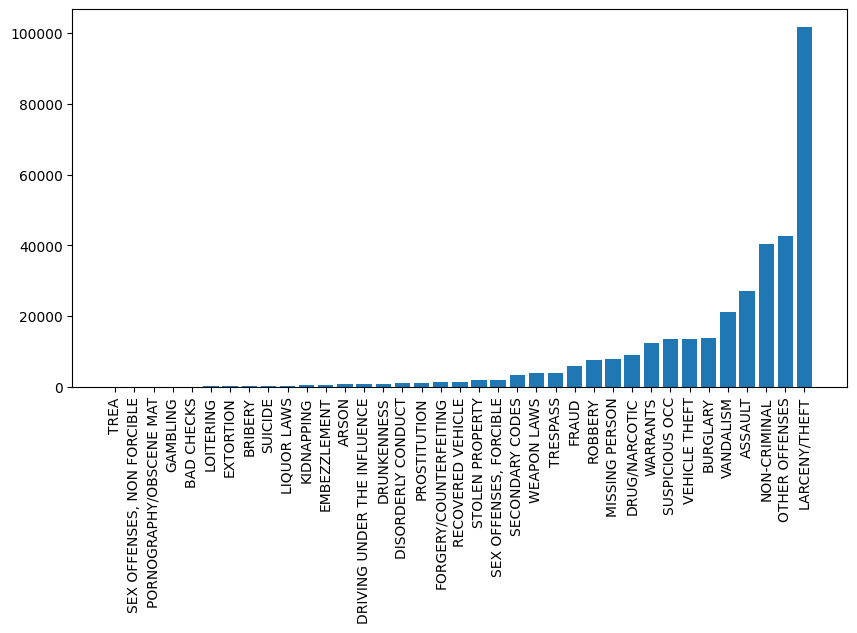

In [114]:
fig, axes = plt.subplots(figsize=(10,5), dpi=100)
plt.bar(cate_count_df.index, cate_count_df.PdId)
_ = plt.xticks(rotation = 90)

In [119]:
# frequency of each category
cate_count_df.iloc[:,0]

Category
TREA                                4
SEX OFFENSES, NON FORCIBLE          5
PORNOGRAPHY/OBSCENE MAT            13
GAMBLING                           43
BAD CHECKS                         67
LOITERING                          89
EXTORTION                         135
BRIBERY                           149
SUICIDE                           171
LIQUOR LAWS                       174
KIDNAPPING                        383
EMBEZZLEMENT                      397
ARSON                             706
DRIVING UNDER THE INFLUENCE       768
DRUNKENNESS                       886
DISORDERLY CONDUCT               1146
PROSTITUTION                     1206
FORGERY/COUNTERFEITING           1329
RECOVERED VEHICLE                1447
STOLEN PROPERTY                  1900
SEX OFFENSES, FORCIBLE           1907
SECONDARY CODES                  3267
WEAPON LAWS                      3842
TRESPASS                         3927
FRAUD                            5992
ROBBERY                          7545
MIS

## Day EDA

In [122]:
# get frequency of each day
cate_count_df = sub_df.groupby('DayOfWeek').count().sort_values(by=['PdId'])

<BarContainer object of 7 artists>

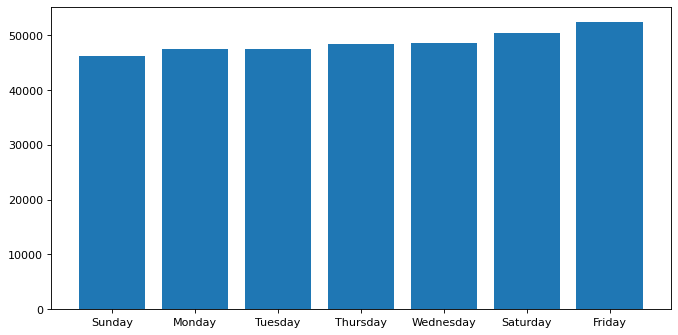

In [123]:
fig, axes = plt.subplots(figsize=(10,5), dpi=80)
plt.bar(cate_count_df.index, cate_count_df.PdId)
# _ = plt.xticks(rotation = 90)

In [124]:
cate_count_df.iloc[:,0]

DayOfWeek
Sunday       46190
Monday       47367
Tuesday      47394
Thursday     48313
Wednesday    48456
Saturday     50383
Friday       52436
Name: PdId, dtype: int64

In [125]:
# frequency table of each day and each category with heat map
cross_df = pd.crosstab(index=sub_df.Category, columns=sub_df.DayOfWeek)
cross_df.style.background_gradient(axis=1, cmap='Blues')

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ARSON,99,106,107,88,99,116,91
ASSAULT,4067,3669,4297,4021,3598,3681,3710
BAD CHECKS,12,9,11,3,13,11,8
BRIBERY,25,21,16,30,13,19,25
BURGLARY,2214,1972,1817,1687,2064,1944,2017
DISORDERLY CONDUCT,122,170,141,124,149,225,215
DRIVING UNDER THE INFLUENCE,131,97,165,137,89,67,82
DRUG/NARCOTIC,1208,1317,1112,1127,1344,1350,1478
DRUNKENNESS,153,95,177,175,105,93,88


## X, Y

C:\Users\tien2\anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


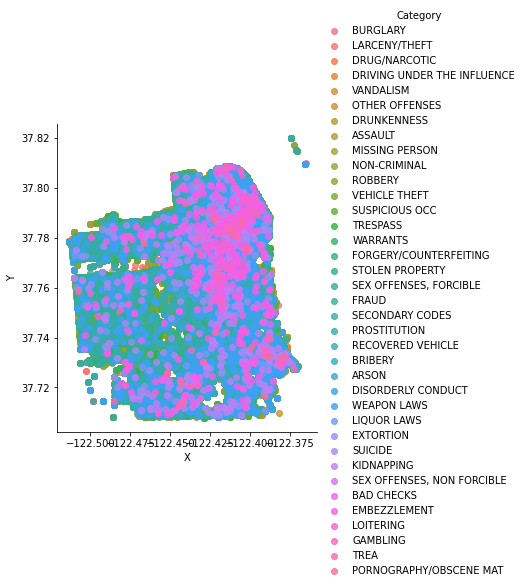

In [95]:
# observe the distribution of all the cases regarding the coordinate
# but I found nothing
# this plot is useless
# not sure what I am doing
# lol
import seaborn as sns
sns.lmplot('X', 'Y', data=sub_df, hue='Category', fit_reg=False)

plt.show()

## time